# The Neuron Gorge
# https://sites.google.com/view/theneurongorge 

# Feature Extraction from Audio

## First Method : Using SciPy

**Step 1. Import all necessary packages**

In [ ]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**Step 2. Load audio file**

In [ ]:
samplerate, data = wavfile.read('BlackWoodpecker.wav')
print('Sample rate of the signal:',samplerate,"Hz")
print('Contents of the signal:',data)
print('Length of the signal:',len(data))
print('Length of the signal:',data.shape)

Sample rate of the signal: 96000 Hz
Contents of the signal: [[  0   0]
 [ 15 -39]
 [ 26 -65]
 ...
 [ 44  13]
 [ 29   3]
 [  0   0]]
Length of the signal: 5082240
Length of the signal: (5082240, 2)


C:\Users\Muhammad_Sohail\AppData\Local\Temp\ipykernel_25128\672332619.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('BlackWoodpecker.wav')


In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
import IPython

IPython.display.Audio(data[:,1],rate=samplerate)

In [ ]:
times = np.arange(len(data[:,0]))/float(samplerate) # Calculate the duration of the signal

# How times is different from data?
print('Minimum time (sec):', min(times))
print('Maximum time (sec):', max(times))
print('Minimum data point value:', min(data[:,0]))
print('Maximum data point value:', max(data[:,0]))

duration = len(data[:,0])/float(samplerate)

print('Duration of the audio in seconds: {:.2f}'.format(duration))

print('Number of samples:',len(data[:,0]))

Minimum time (sec): 0.0
Maximum time (sec): 52.939989583333336
Minimum data point value: -1023094592
Maximum data point value: 992956224
Duration of the audio in seconds: 52.94
Number of samples: 5082240


**Step 3. Plot the raw signal (i.e. audio waveform)**

This is a time domain representation of an audio signal, where only time and corresponding amplitude information is available. This kind of representation does not provide much information.

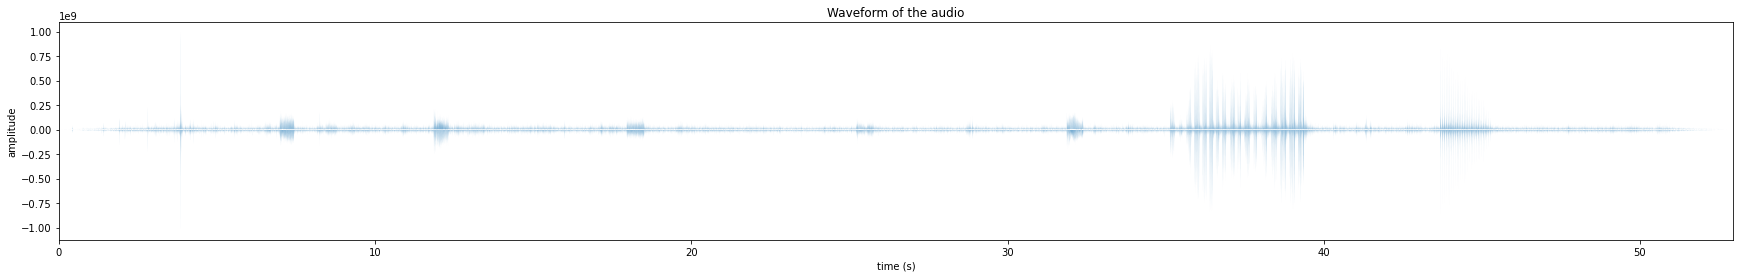

In [ ]:
# Time domain representation
# Make the plot

plt.figure(figsize=(30, 4))

plt.fill_between(times, data[:,0])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.xlim(times[0],times[-1])
plt.title('Waveform of the audio')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.savefig('plot_scipy_audio.png', dpi=300)
plt.show()

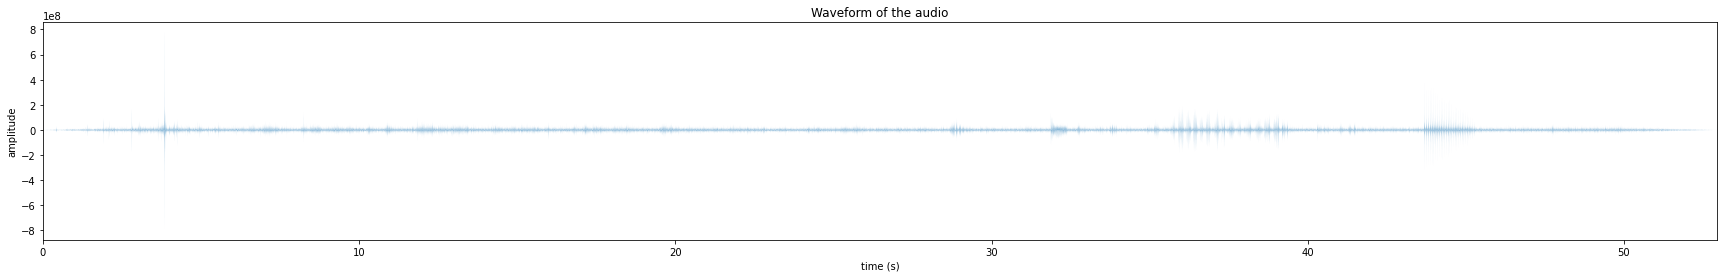

In [ ]:
# Time domain representation
# Make the plot

plt.figure(figsize=(30, 4))

plt.fill_between(times, data[:,1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.xlim(times[0],times[-1])
plt.title('Waveform of the audio')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.savefig('plot_scipy_audio.png', dpi=300)
plt.show()

**Step 4. Plot Frequency Spectrum**

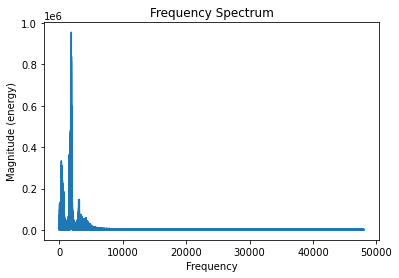

In [ ]:
[a,b,c] = plt.magnitude_spectrum(data[:,0],Fs=samplerate)

plt.title('Frequency Spectrum')
plt.show()

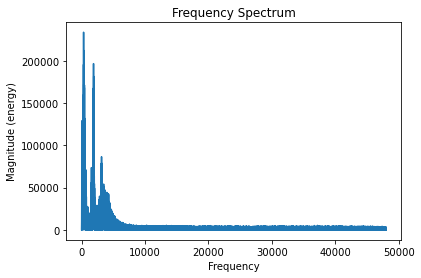

In [ ]:
[a,b,c] = plt.magnitude_spectrum(data[:,1],Fs=samplerate)

plt.title('Frequency Spectrum')
plt.show()

# Second Method : Using Librosa

In [ ]:
!pip install librosa

     -------------------------------------- 253.7/253.7 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 1.8 MB/s eta 0:00:00


     ---------------------------------------- 60.9/60.9 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 185.0/185.0 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 2.4.0
    Uninstalling platformdirs-2.4.0:
      Successfully uninstalled platformdirs-2.4.0


In [ ]:
!pip install numba --upgrade

  Using cached numba-0.58.1-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached llvmlite-0.41.1-cp38-cp38-win_amd64.whl (28.1 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.36.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [ ]:
import librosa

audio_path = 'BlackWoodpecker.wav'

x , sr = librosa.load(audio_path)

print("Sample rate:",sr)
print("Duration of the signal in seconds: {:.2f}".format(len(x)/sr))

Exception ignored in: <function Wave_write.__del__ at 0x000001BBE0848AF0>
Traceback (most recent call last):
  File "C:\Users\Muhammad_Sohail\anaconda3\lib\wave.py", line 327, in __del__
    self.close()
  File "C:\Users\Muhammad_Sohail\anaconda3\lib\wave.py", line 445, in close
    self._ensure_header_written(0)
  File "C:\Users\Muhammad_Sohail\anaconda3\lib\wave.py", line 468, in _ensure_header_written
    self._write_header(datasize)
  File "C:\Users\Muhammad_Sohail\anaconda3\lib\wave.py", line 472, in _write_header
    self._file.write(b'RIFF')
ValueError: I/O operation on closed file.


Sample rate: 22050
Duration of the signal in seconds: 52.94


In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

**Visualizing audio files**

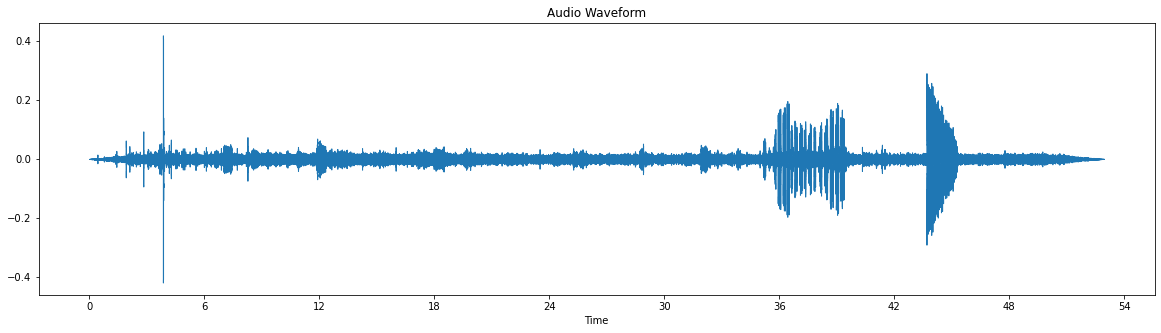

In [36]:
import librosa.display

plt.figure(figsize=(20, 5))
plt.title('Audio Waveform')
librosa.display.waveshow(x, sr=sr)

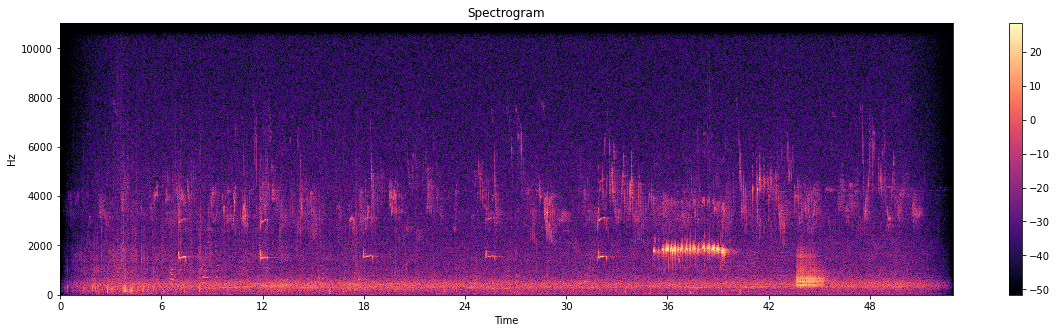

In [37]:
# This is spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectrogram')
plt.colorbar()

In [38]:
import soundfile as sf

In [39]:
X, sample_rate = sf.read('BlackWoodpecker.wav', dtype='float32')
len(X)

5082240

In [52]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=X[:,1], sr=sample_rate, hop_length=hop_length)
len(chromagram[0])

9927

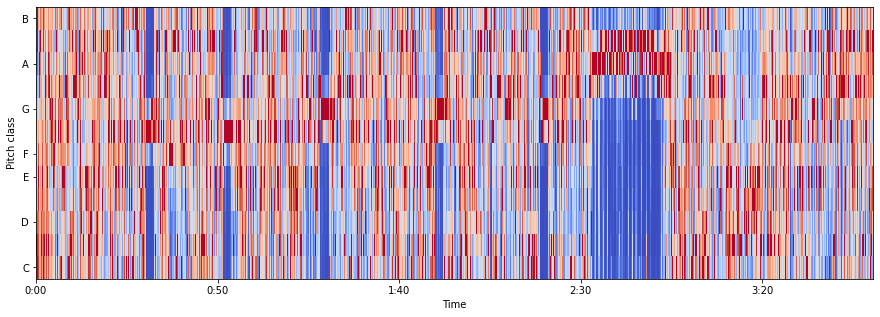

In [46]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [47]:
# Applying Short Term Fourier Transform
stft = np.abs(librosa.stft(X[:,0]))
print (len(stft))

1025


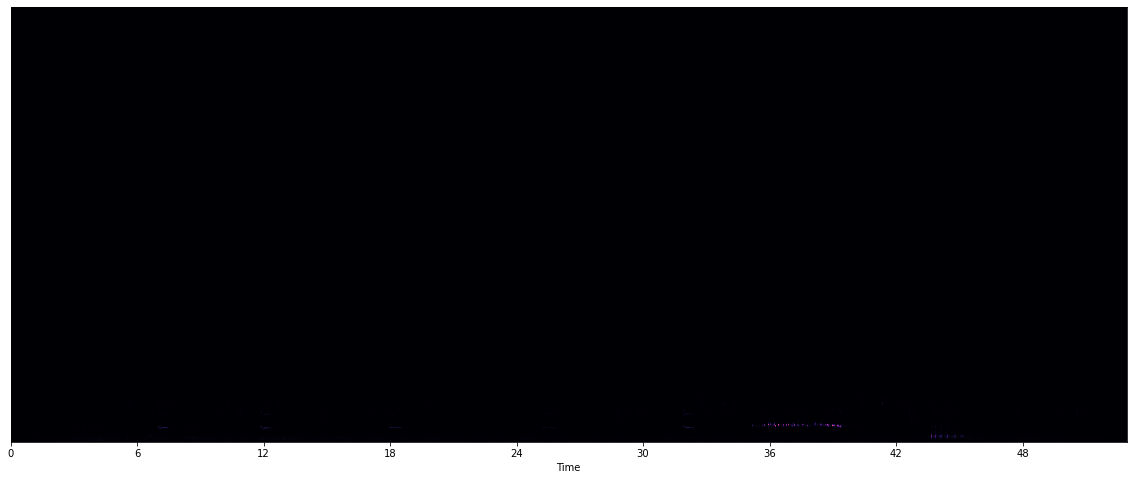

In [48]:
plt.figure(figsize=(20,8))
librosa.display.specshow(stft, sr=sample_rate, x_axis='time')

In [49]:
MFCC_Features = librosa.feature.mfcc(y=X[:,0], sr=sample_rate)
print (len(MFCC_Features))

20


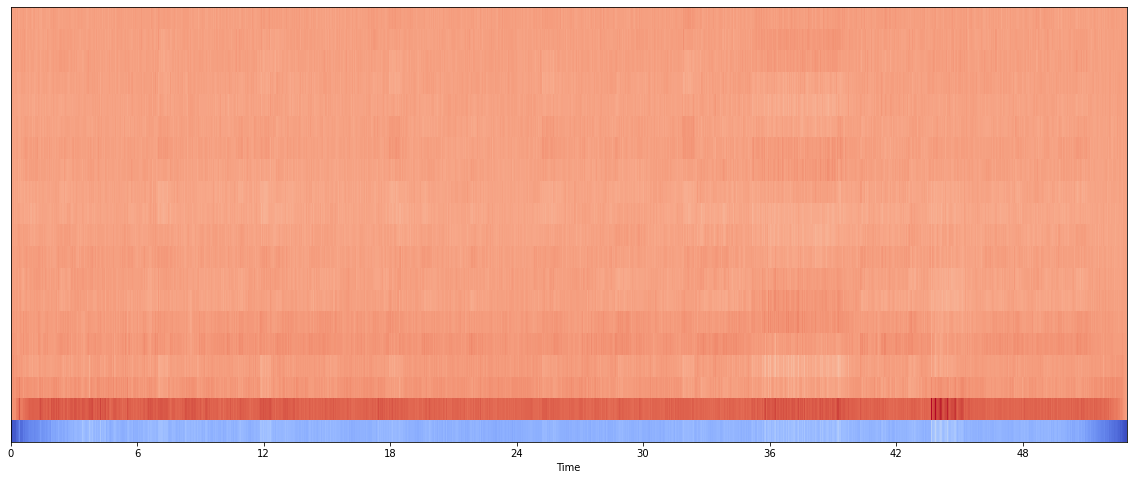

In [50]:
plt.figure(figsize=(20,8))
librosa.display.specshow(MFCC_Features, sr=sample_rate, x_axis='time')

# Lab Tasks
* Read an audio file using scipy and display original audio first then take only the signal values that are negative or zero and display audio again. What is the duration of both audios. 
* Generate an audio signal of half a Million length using random function with integer values between -30 and 30. Add last digit of your rollno Plot in entire signal. Display the audio, it's duration and the raw signal.
* Load an audio file using librosa. Read Match.csv file. Add column Toss_Winner_Id to your signal (if signal has length bigger than column length then start column again from begining untill entire signal has been tempered). Display audio and visualize the signal. 
* Display spectrogram of one of above audios. Take frequency on x-axis and time on y-axis. Note: If signal value is negative then take it's cube before absolute. Set figuer size 15,10.
* Read a new audiofile using soundfile library, remove values that are same or are multiple of last digit of your roll-no (if last digit is zero then use 3). Create it's chromagram and display it. Use hopelength=last three digits of your roll no. Also apply and display it's short term fourior transfor.
* Read a video file, iterate it frame by frame. Slice/crope and display all detected faces.